**SET UP AND LOAD DATA**

In [ ]:
# Kaggle
%pip install kaggle

In [ ]:
# Configuring the kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

FileNotFoundError: [Errno 2] No such file or directory: 'dogs-vs-cats.zip'

In [ ]:
# extracting the train dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [ ]:
import os
# Counting the total number of files in train
path, dirs, files = next(os.walk('train'))

file_count = len(files)
print('Total number of images: ', file_count)

Total number of images:  25000


**PRINTING THE IMAGE PROPERITES**

In [ ]:
# Name
names_list = os.listdir('train')
print(names_list)

['dog.2767.jpg', 'cat.6621.jpg', 'dog.8625.jpg', 'cat.11633.jpg', 'dog.9645.jpg', 'cat.466.jpg', 'cat.11298.jpg', 'cat.2796.jpg', 'cat.2049.jpg', 'cat.8647.jpg', 'cat.3037.jpg', 'dog.111.jpg', 'dog.10659.jpg', 'cat.2675.jpg', 'dog.10307.jpg', 'dog.12137.jpg', 'dog.2508.jpg', 'cat.6184.jpg', 'dog.12447.jpg', 'dog.9281.jpg', 'cat.3126.jpg', 'cat.10812.jpg', 'dog.7264.jpg', 'cat.7114.jpg', 'cat.3159.jpg', 'dog.4023.jpg', 'cat.7384.jpg', 'dog.4309.jpg', 'cat.8442.jpg', 'dog.113.jpg', 'dog.3754.jpg', 'dog.3299.jpg', 'cat.10816.jpg', 'dog.8815.jpg', 'cat.7109.jpg', 'dog.199.jpg', 'cat.174.jpg', 'dog.11314.jpg', 'cat.2105.jpg', 'dog.11834.jpg', 'dog.9200.jpg', 'dog.3652.jpg', 'cat.7148.jpg', 'dog.8488.jpg', 'cat.1396.jpg', 'dog.12441.jpg', 'cat.8024.jpg', 'dog.5928.jpg', 'dog.9474.jpg', 'cat.821.jpg', 'cat.10743.jpg', 'dog.10820.jpg', 'cat.1883.jpg', 'cat.11838.jpg', 'cat.11345.jpg', 'cat.11302.jpg', 'cat.9947.jpg', 'dog.10623.jpg', 'cat.105.jpg', 'cat.1973.jpg', 'cat.14.jpg', 'cat.9271.jpg',

**IMPORTING THE DEPENDENCIES**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

**DISPLAYING THE IMAGES OF DOGS AND CATS**

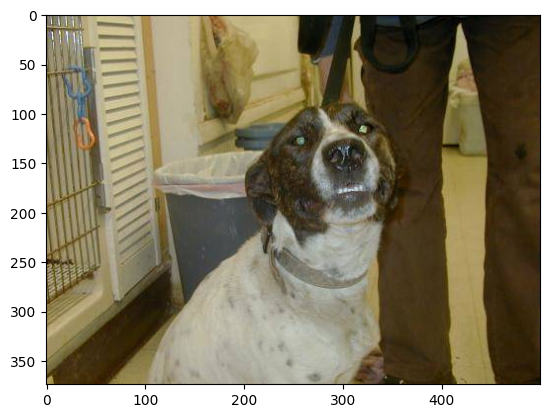

In [ ]:
# Display dog image
img = mpimg.imread('train/dog.5368.jpg')
imgplt = plt.imshow(img)
plt.show()

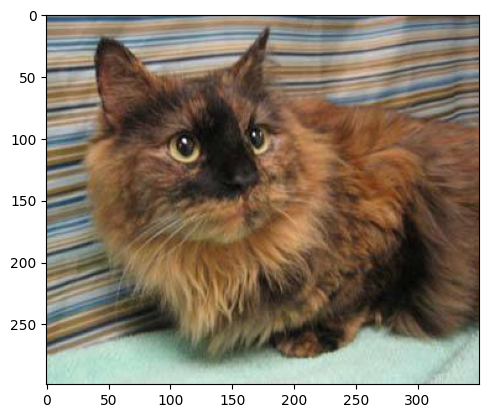

In [ ]:
# Display cat image
img = mpimg.imread('train/cat.1252.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog:', dog_count)
print('Number of cat:', cat_count)


Number of dog: 12500
Number of cat: 12500


**RESIZING THE IMAGES**

In [ ]:
# Creating a directory for resized images
os.mkdir('resized')

In [ ]:
# Resizing
import random
original_folder = 'train/'
resized_folder = 'resized/'


for i in range(2000):

  filename = os.listdir(original_folder)[random.randrange(0,25000)]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

**CREATING LABELS FOR IMAGES OF DOGS AND CATS (CATS = 1, DOGS = 0)**

In [ ]:
import os

file_dir = 'resized/'
filenames = os.listdir(file_dir)  # Get a list of filenames in the directory

labels = []

for file_name in filenames:
    label = file_name[:3]  # Extract the first 3 characters as the label

    if label == 'dog':
        labels.append(0)
    else:
        labels.append(1)

In [ ]:
# Testing
print(filenames[0:5])
print(len(filenames))

print(labels[0:5])
print(len(labels))

['dog.4309.jpg', 'cat.8442.jpg', 'dog.11629.jpg', 'cat.8628.jpg', 'dog.7312.jpg']
1939
[0, 1, 0, 1, 0]
1939


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[984 955]


**CONVERTING THE RESIZED IMAGE TO NUMPY ARRAYS**


In [ ]:
import cv2
import glob

In [ ]:
resized_folder = 'resized/'

image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(resized_folder + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**TRAIN TEST SPLIT**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1939, 224, 224, 3) (1551, 224, 224, 3) (388, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

**BUILDING THE NEURO NETWORK**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
49/49 [==============================] - 62s 1s/step - loss: 0.2134 - acc: 0.9104
Epoch 2/5
49/49 [==============================] - 54s 1s/step - loss: 0.0634 - acc: 0.9839
Epoch 3/5
49/49 [==============================] - 55s 1s/step - loss: 0.0492 - acc: 0.9839
Epoch 4/5
49/49 [==============================] - 61s 1s/step - loss: 0.0393 - acc: 0.9890
Epoch 5/5
49/49 [==============================] - 58s 1s/step - loss: 0.0322 - acc: 0.9936


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0927 - acc: 0.9716
Test Loss = 0.09274061024188995
Test Accuracy = 0.9716494679450989


Path of the image to be predicted: /content/cat-png-17.png


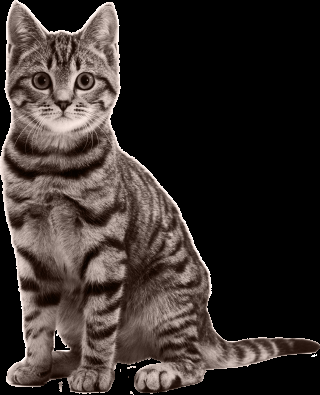

1/1 [==============================] - 0s 61ms/step
[[-3.6503215  4.1137166]]
1
Output: Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Output: Dog')

else:
  print('Output: Cat')